In [1]:
import pandas as pd
import os
from pprint import pprint
import requests
import json
from config import api_key
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Made edits in excel, pulling back in
clean_hospital= pd.read_csv("Cleaned_Hospitals_v7.csv")
clean_hospital = clean_hospital.drop(columns=['Unnamed: 0'])
clean_hospital

,Hospital name,City,County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,Hospital Longtitude,Street Address,State,Hospital Zip Code,Full Address,City Zip Code,City Latitude,City Longtitude,Median Income,Population,Joined
0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,-84.926304,1035 Red Bud Road Northeast,Georgia,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30702.0,34.487833,-84.850071,24110,40820,False
1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,-84.783038,707 Old Dalton Ellijay Road,Georgia,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,24457,33460,False
2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,-83.972128,915 Gordon Avenue,Georgia,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31776.5,30.862504,-83.928812,22498,20703,False
3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,-83.559146,903 North Court Street,Georgia,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,24644,9062,False
4,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,-84.205317,90 East Stephens Street,Georgia,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,21584,8419,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,NaN,Wrens,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30833.0,33.200325,-82.376250,18634,3065,True
613,NaN,Wrightsville,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31096.0,32.717320,-82.689260,20232,7046,True
614,NaN,Yatesville,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31097.0,32.912207,-84.148120,27000,1656,True
615,NaN,Young Harris,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30582.0,34.954638,-83.864840,15867,5038,True


In [3]:
hospital_data = clean_hospital[['Hospital name', 'City', 'County','Acute Care Beds', 'Median Income','Population']]
hospital_data

hospital_sum_city = hospital_data.groupby('City').sum()
hospital_sum_city = hospital_sum_city.reset_index()
hospital_sum_city

,City,Acute Care Beds,Median Income,Population
0,Abbeville,0,20880,4563
1,Acworth,0,33711,49841
2,Adairsville,0,24570,16138
3,Adel,60,25632,10836
4,Adrian,0,19562,3071
...,...,...,...,...
587,Wrens,0,18634,3065
588,Wrightsville,0,20232,7046
589,Yatesville,0,27000,1656
590,Young Harris,0,15867,5038


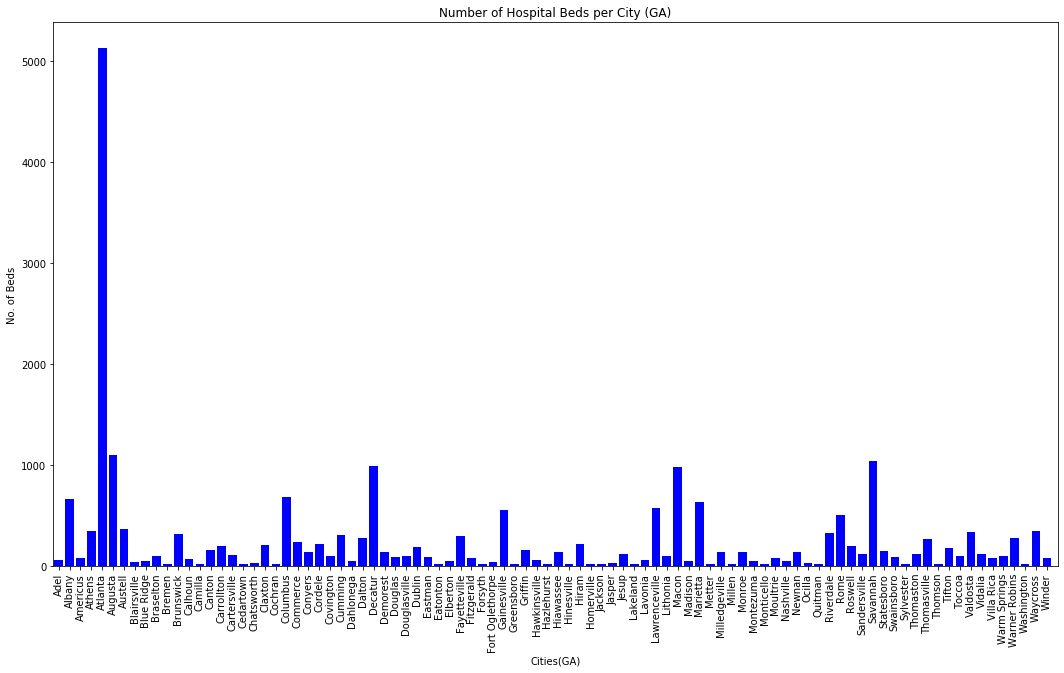

In [4]:
hospital_bed_city = hospital_sum_city.loc[(hospital_sum_city['Acute Care Beds'] > 0)]
hospital_bed_city
plt.figure(figsize=(18,10))
plt.bar(hospital_bed_city['City'],hospital_bed_city['Acute Care Beds'], color="blue")
plt.xticks(hospital_bed_city['City'], rotation='vertical')
plt.title('Number of Hospital Beds per City (GA)')
plt.xlabel('Cities(GA)')
plt.ylabel('No. of Beds')
plt.xlim(-0.5,len(hospital_bed_city['City']))

plt.savefig("Hospital_Beds_per_City.png")

plt.show()



In [5]:
hospital_count_city = hospital_data.groupby('City').count()
hospital_count_city = hospital_count_city.reset_index()
hospital_count_city



,City,Hospital name,County,Acute Care Beds,Median Income,Population
0,Abbeville,0,0,1,1,1
1,Acworth,0,0,1,1,1
2,Adairsville,0,0,1,1,1
3,Adel,1,1,1,1,1
4,Adrian,0,0,1,1,1
...,...,...,...,...,...,...
587,Wrens,0,0,1,1,1
588,Wrightsville,0,0,1,1,1
589,Yatesville,0,0,1,1,1
590,Young Harris,0,0,1,1,1


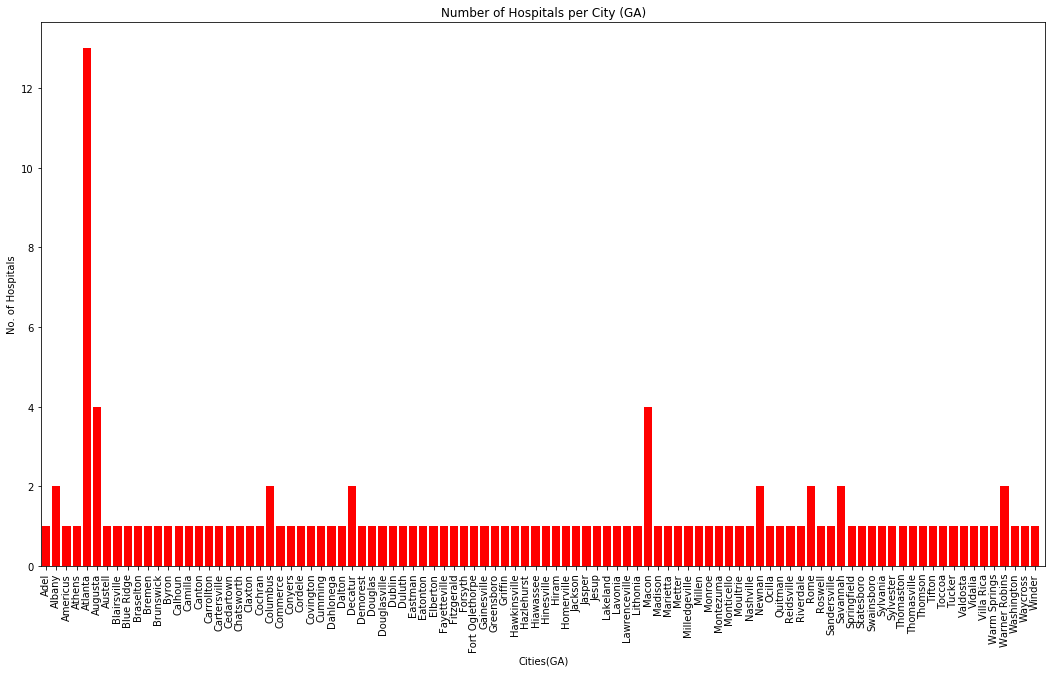

In [6]:
hospital_count_city = hospital_count_city.loc[(hospital_count_city['Hospital name'] > 0)]
hospital_count_city


plt.figure(figsize=(18,10))
plt.bar(hospital_count_city['City'],hospital_count_city['Hospital name'], color="red")
plt.xticks(hospital_count_city['City'], rotation='vertical')
plt.title('Number of Hospitals per City (GA)')
plt.xlabel('Cities(GA)')
plt.ylabel('No. of Hospitals')
plt.xlim(-0.5,len(hospital_count_city['City']))


plt.savefig("Hospitals_per_City1.png")
plt.show()


In [7]:
hospital_sum_county = hospital_data.groupby('County').sum()
hospital_sum_county = hospital_sum_county.reset_index()
hospital_sum_county['County'].replace(regex=True,inplace=True,to_replace=r'County',value=r'')
hospital_sum_county

,County,Acute Care Beds,Median Income,Population
0,Baldwin,140,18000,22130
1,Barrow,80,26214,42975
2,Bartow,112,28639,32313
3,Ben Hill,75,20822,18322
4,Berrien,51,21910,10237
...,...,...,...,...
86,Washington,116,22395,9636
87,Wayne,115,20779,9990
88,Whitfield,282,25269,40921
89,Wilkes,25,19859,7626


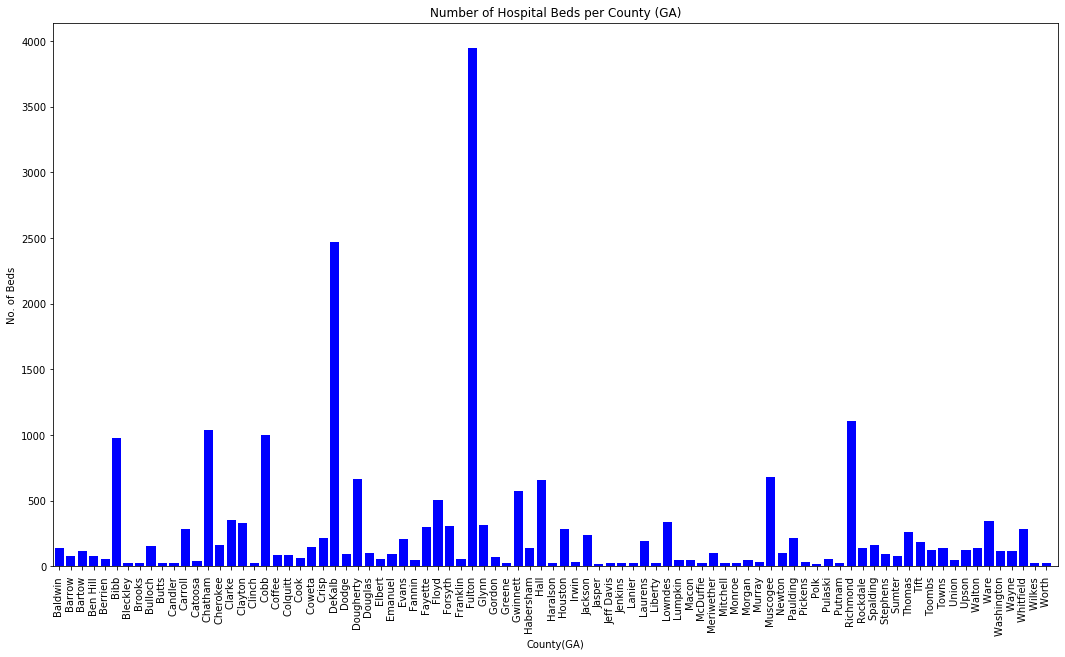

In [8]:
hospital_bed_county = hospital_sum_county.loc[(hospital_sum_county['Acute Care Beds'] > 0)]
hospital_bed_county
plt.figure(figsize=(18,10))
plt.bar(hospital_bed_county['County'],hospital_bed_county['Acute Care Beds'], color="blue")
plt.xticks(hospital_bed_county['County'], rotation='vertical')
plt.title('Number of Hospital Beds per County (GA)')
plt.xlabel('County(GA)')
plt.ylabel('No. of Beds')
plt.xlim(-0.5,len(hospital_bed_county['County']))

plt.savefig("Hospital_Beds_per_County.png")

plt.show()


In [9]:
hospital_count_county = hospital_data.groupby('County').count()
hospital_count_county = hospital_count_county.reset_index()
hospital_count_county['County'].replace(regex=True,inplace=True,to_replace=r'County',value=r'')
hospital_count_county


,County,Hospital name,City,Acute Care Beds,Median Income,Population
0,Baldwin,1,1,1,1,1
1,Barrow,1,1,1,1,1
2,Bartow,1,1,1,1,1
3,Ben Hill,1,1,1,1,1
4,Berrien,1,1,1,1,1
...,...,...,...,...,...,...
86,Washington,1,1,1,1,1
87,Wayne,1,1,1,1,1
88,Whitfield,1,1,1,1,1
89,Wilkes,1,1,1,1,1


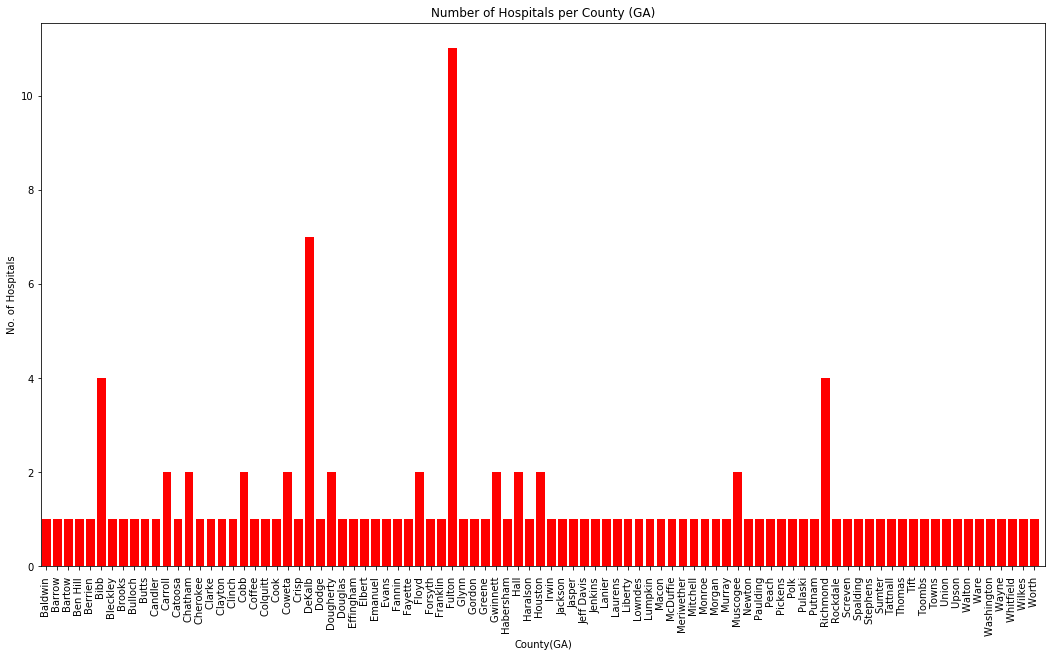

In [10]:
hospital_count_county = hospital_count_county.loc[(hospital_count_county['Hospital name'] > 0)]
hospital_count_county


plt.figure(figsize=(18,10))
plt.bar(hospital_count_county['County'],hospital_count_county['Hospital name'], color="red")
plt.xticks(hospital_count_county['County'], rotation='vertical')
plt.title('Number of Hospitals per County (GA)')
plt.xlabel('County(GA)')
plt.ylabel('No. of Hospitals')
plt.xlim(-0.5,len(hospital_count_county['County']))


plt.savefig("Hospitals_per_County.png")
plt.show()

In [11]:
# beds by population by city
hospital_sum_city = hospital_sum_city.loc[(hospital_sum_city['Acute Care Beds'] > 0)]
hospital_sum_city


hospital_sum_city["Population per Bed"] = hospital_sum_city["Population"]/hospital_sum_city["Acute Care Beds"]
hospital_sum_city['Population per Bed'].replace(np.inf, 0, inplace=True)
hospital_sum_city

C:\Users\u14849\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\u14849\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,City,Acute Care Beds,Median Income,Population,Population per Bed
3,Adel,60,25632,10836,180.600000
8,Albany,668,41556,50208,75.161677
16,Americus,76,21422,12402,163.184211
25,Athens,350,14474,21862,62.462857
26,Atlanta,5124,-285267632,336947,65.758587
...,...,...,...,...,...
556,Warm Springs,104,16714,2571,24.721154
557,Warner Robins,282,57754,57968,205.560284
561,Washington,25,19859,7626,305.040000
565,Waycross,345,23209,16850,48.840580


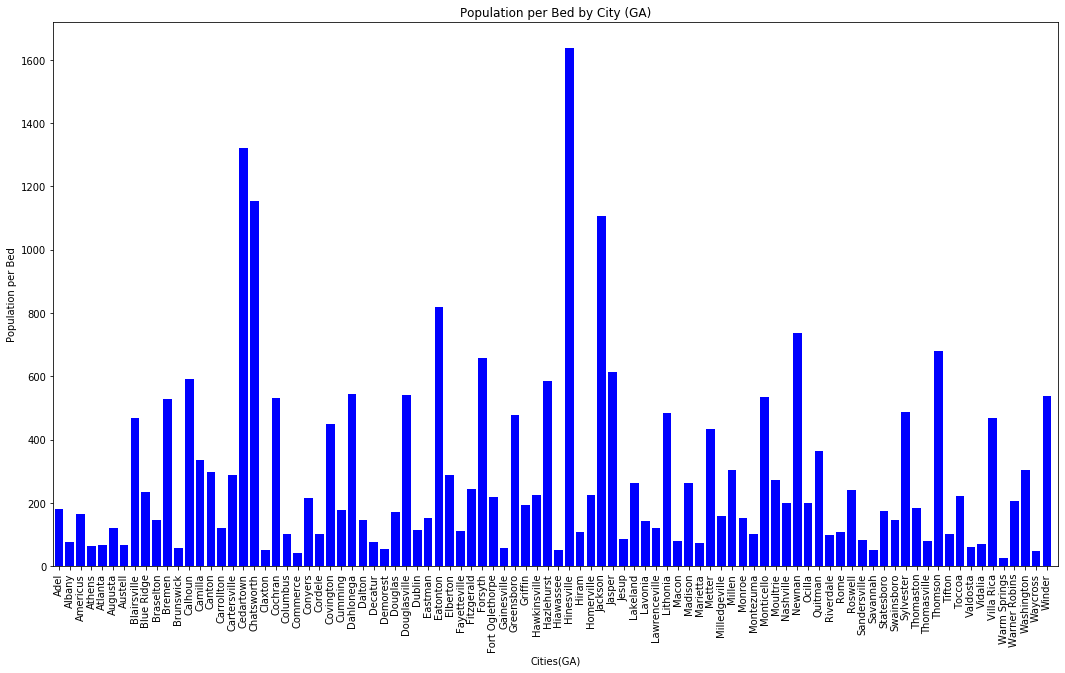

In [12]:

plt.figure(figsize=(18,10))
plt.bar(hospital_sum_city['City'],hospital_sum_city["Population per Bed"], color="blue")
plt.xticks(hospital_sum_city['City'], rotation='vertical')
plt.title('Population per Bed by City (GA)')
plt.xlabel('Cities(GA)')
plt.ylabel('Population per Bed')
plt.xlim(-0.5,len(hospital_sum_city['City']))

plt.savefig("Population_per_Bed_by_City.png")

plt.show()

In [13]:
hospital_sum_county = hospital_sum_county.loc[(hospital_sum_county['Acute Care Beds'] > 0)]
hospital_sum_county


hospital_sum_county["Population per Bed"] = hospital_sum_county["Population"]/hospital_sum_county["Acute Care Beds"]
hospital_sum_county['Population per Bed'].replace(np.inf, 0, inplace=True)
hospital_sum_county

C:\Users\u14849\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\u14849\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,County,Acute Care Beds,Median Income,Population,Population per Bed
0,Baldwin,140,18000,22130,158.071429
1,Barrow,80,26214,42975,537.187500
2,Bartow,112,28639,32313,288.508929
3,Ben Hill,75,20822,18322,244.293333
4,Berrien,51,21910,10237,200.725490
...,...,...,...,...,...
86,Washington,116,22395,9636,83.068966
87,Wayne,115,20779,9990,86.869565
88,Whitfield,282,25269,40921,145.109929
89,Wilkes,25,19859,7626,305.040000


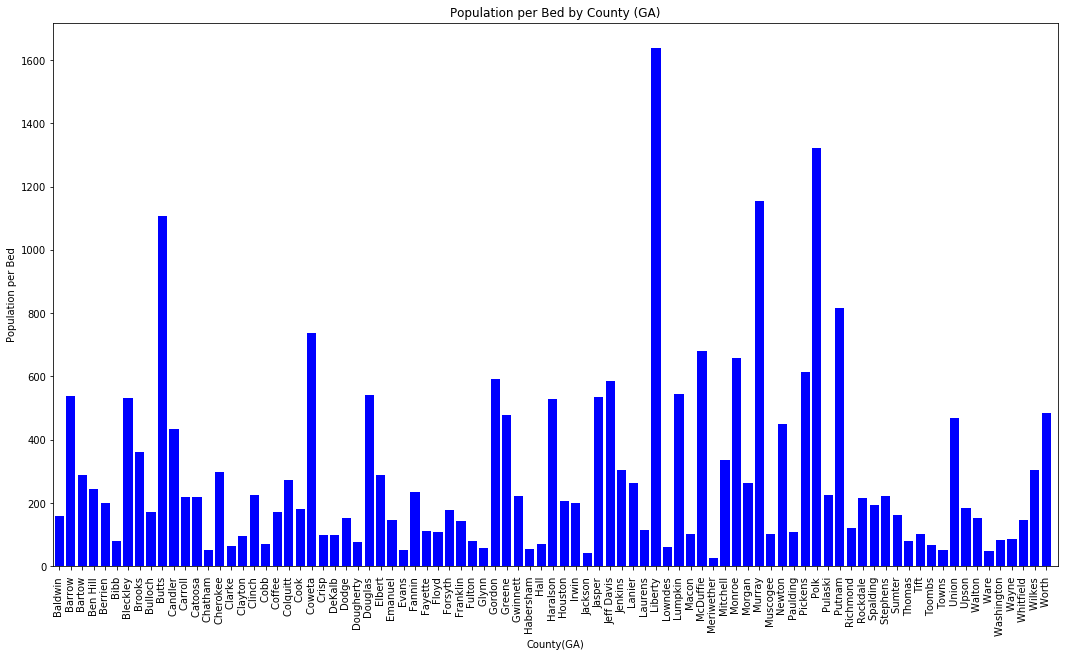

In [14]:

plt.figure(figsize=(18,10))
plt.bar(hospital_sum_county['County'],hospital_sum_county["Population per Bed"], color="blue")
plt.xticks(hospital_sum_county['County'], rotation='vertical')
plt.title('Population per Bed by County (GA)')
plt.xlabel('County(GA)')
plt.ylabel('Population per Bed')
plt.xlim(-0.5,len(hospital_sum_county['County']))

plt.savefig("Population_per_Bed_by_County.png")

plt.show()

In [15]:
hospital_data = clean_hospital[['Hospital name', 'City', 'County','Acute Care Beds', 'Median Income','Population']]
hospital_data

income_sum_city = hospital_data.groupby('City').sum()
income_sum_city = income_sum_city.reset_index()
income_sum_city


income_city = hospital_sum_city.loc[(hospital_sum_city['Acute Care Beds'] > 0)]
income_city

,City,Acute Care Beds,Median Income,Population,Population per Bed
3,Adel,60,25632,10836,180.600000
8,Albany,668,41556,50208,75.161677
16,Americus,76,21422,12402,163.184211
25,Athens,350,14474,21862,62.462857
26,Atlanta,5124,-285267632,336947,65.758587
...,...,...,...,...,...
556,Warm Springs,104,16714,2571,24.721154
557,Warner Robins,282,57754,57968,205.560284
561,Washington,25,19859,7626,305.040000
565,Waycross,345,23209,16850,48.840580
